<a href="https://colab.research.google.com/github/arh2308/03MAIR-Algoritmos-de-Optimizacion/blob/main/AG2/AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Actividad guiada 2
Antonio Ruiz Hernandez
https://colab.research.google.com/drive/1GKw50uA9aerDcuzJLkDBMcvFU6QnxGZh?usp=sharing


###Viaje por el rio

In [ ]:
#Viaje por el rio

import math
import timeit

Tarifas = [
[0,5,4,3,999,999,999],        #desde nodo 0
[999,0,999,2,3,999,11],       #desde nodo 1
[999,999, 0,1,999,4,10],      #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

def Precios(Tarifas):

  N = len(Tarifas)   #Numero de embarcaderos
  
  #Inicialización de la tabla de precios
  Precios = [ [9999]*N for i in range(N)]  

  #Inicialización de los puntos de inicio y fin
  Ruta = [ [""]*N for i in [""]*N]

  for i in range(N-1):
  # Recorremos el punto en el que nos encontramos hacia adelante. 
    for j in range(i+1, N):
    # Recorremos el punto i+1 en el que nos encontramos hacia adelante.
      Minimo = Tarifas[i][j]
      Ruta[i][j] = i
      # Recorrelos puntos intermedios entre 'i' y 'j' para calcular el minimo para ir de i a j
      for k in range(i, j):
        if (Precios[i][k] + Tarifas[k][j]) < Minimo:
            Minimo = min(Minimo, Precios[i][k] + Tarifas[k][j] )
            Ruta[i][j] = k
      Precios[i][j] = Minimo  # Coste minimo
        
  return Precios,Ruta

def calcular_ruta(Ruta, desde, hasta):
  if desde == hasta:
    print("Destino alcanzado")
    return desde 
  
  else:
    # Acumula en un str los puertos donde ha estado
    string_puerto = calcular_ruta(Ruta, desde, Ruta[desde][hasta])
        
    # Ultimo puerto visitado antes de el destino
    ultimo_puerto = Ruta[desde][hasta]
    
    print ("Puerto origen=",string_puerto,"Ultimo puerto=", ultimo_puerto)
  return str(string_puerto)+  ',' + str(ultimo_puerto)

%time calcular_ruta(Ruta,1,6) # Ir del puerto origen al puerto de destino

Destino alcanzado
Puerto origen= 1 Ultimo puerto= 1
Puerto origen= 1,1 Ultimo puerto= 4
CPU times: user 264 µs, sys: 1.07 ms, total: 1.34 ms
Wall time: 983 µs


'1,1,4'

In [ ]:
Precios,Ruta = Precios(Tarifas)  

print("PRECIOS")
for i in range(len(Tarifas)):
  print(Precios[i])

print("\nRUTA")  
for i in range(len(Tarifas)):
  print(Ruta[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


##Problema de Asignacion de tarea

In [ ]:
#Asignacion de tarea

import math
import timeit

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

#Devuelve el coste para una solucion parcial        
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
    #print (VALOR,COSTES[S[i]][i] )
  return VALOR

#Coste inferior para soluciones parciales
def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
    #print ("CI valores establecidos=",VALOR,COSTES[S[i]][i] )
  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
    #print ("CI Estimacion=",VALOR )
  return VALOR

#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
      #print (HIJOS)
  return HIJOS

#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
def ramificacion_y_poda(COSTES):
  iteracion = 0
  NODOS=[]

  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  print (MEJOR_SOLUCION)
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']

    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]
    #print (HIJOS)

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]
    #print (HIJOS)

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
    #print (NODOS)
    
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      

%time ramificacion_y_poda(COSTES)

(0, 1, 2, 3)
La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4
CPU times: user 1.07 ms, sys: 9 µs, total: 1.08 ms
Wall time: 1.11 ms


##Descenso del gradiente

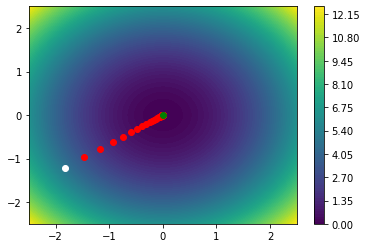

Solucion: [-6.4246291120926445e-49, -4.23994351246109e-49] 5.92529802168092e-97


In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
import scipy as sc
import random

#Definimos la funcion paraboloide
f  = lambda X:      X[0]**2+X[1]**2      #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA=.1 

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))
